In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [288]:
data = pd.read_csv("/content/drive/MyDrive/Data/5-synthetic_food_dataset_imbalanced.csv")

In [289]:
data.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


In [290]:
data.describe()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
count,9076.000000,9076.000000,9076.000000,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000,9075.000000
mean,274.130516,9.514255,12.574795,29.029077,8.547740,1.894083,336.976225,26.894580,64.362342,48.647768,150.362214
std,110.109046,7.979428,8.347228,12.580153,7.947383,1.759507,317.835414,24.769099,25.211525,20.568931,51.848477
min,60.786204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.719862,62.471162
25%,211.961570,3.850595,8.423383,25.206204,3.763292,0.746969,64.280618,12.737052,60.109248,38.710082,108.171434
50%,283.026993,9.034002,11.661482,29.788163,5.517582,1.644563,293.184429,23.270968,68.573025,45.431299,151.738892
75%,329.061053,12.669358,15.887782,34.704312,14.453675,2.632058,632.677108,35.226147,75.539325,52.122405,189.029179
max,1289.956763,81.761772,88.619611,140.585537,78.548162,18.891993,2724.236846,260.149443,286.126400,251.837472,554.719629


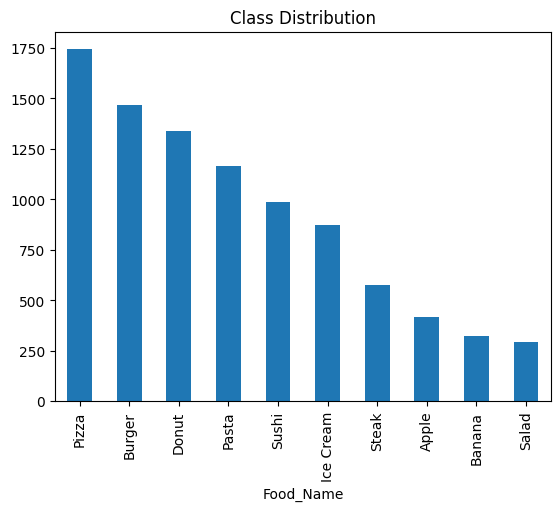

In [291]:
data.iloc[:,-1].value_counts().plot(kind="bar")
plt.title("Class Distribution")
plt.show()

In [292]:
data.isnull().sum()

,0
Calories,107
Protein,107
Fat,107
Carbs,108
Sugar,108
Fiber,108
Sodium,108
Cholesterol,108
Glycemic_Index,108
Water_Content,108


In [293]:
obj_data= data.select_dtypes(include = "object").columns
data = data.dropna(subset = obj_data)

In [294]:
data.fillna(data.median (numeric_only=True), inplace = True)

In [295]:
data.duplicated().sum()

np.int64(47)

In [296]:
data.drop_duplicates(inplace=True)

In [297]:
data.duplicated().sum()

np.int64(0)

In [298]:
X = data.drop("Food_Name", axis=1)
y = data["Food_Name"]

In [299]:
num_cols = X.select_dtypes(include=['float64','int64']).columns
cat_cols = X.select_dtypes(include=['object','bool']).columns

print("Numerical:", num_cols)
print("Categorical:", cat_cols)

Numerical: Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size'],
      dtype='object')
Categorical: Index(['Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free'], dtype='object')


In [300]:
num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

In [301]:
cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [302]:
preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, cat_cols)
])

In [303]:
traindata, testdata, trainlab, testlab = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [304]:
model = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    ))
])


In [305]:
model.fit(traindata, trainlab)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [306]:
tr_prd = model.predict(traindata)
te_prd = model.predict(testdata)

In [307]:
accuracy_score(testlab, te_prd)

0.9923371647509579

In [308]:
accuracy_score(trainlab, tr_prd)

0.9953475643130816

In [309]:
train_acc = accuracy_score(trainlab, tr_prd)
test_acc = accuracy_score(testlab, te_prd)

pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "Accuracy": [train_acc, test_acc]
})


,Dataset,Accuracy
0,Train,0.995348
1,Test,0.992337


In [310]:
# Decision Tree

In [311]:
model = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", DecisionTreeClassifier(
        random_state=42,
        class_weight="balanced"
    ))
])


In [312]:
model.fit(traindata, trainlab)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free'], dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

In [313]:
tr_prd =model.predict(traindata)
te_prd = model.predict(testdata)

In [314]:
accuracy_score(testlab, te_prd)

0.9835796387520526

In [315]:
accuracy_score(trainlab, tr_prd)

0.9953475643130816

In [316]:
train_acc = accuracy_score(trainlab, tr_prd)
test_acc = accuracy_score(testlab, te_prd)

pd.DataFrame({
    "Dataset" : ["Train", "Test"],
    "Accuracy" : [train_acc , test_acc]
})

,Dataset,Accuracy
0,Train,0.995348
1,Test,0.983580


In [317]:
#Gradiat Boost

In [318]:
model = Pipeline([
    ("preprocessing" , preprocessor),
    ("classifier" , GradientBoostingClassifier(n_estimators=400 , random_state=99 , max_depth=4))
])

In [319]:
model.fit(traindata , trainlab)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free'], dtype='object'))])),
                ('classifier',
                 GradientBoostingClassifier(max_depth=4, n_estimators=400,
                                            random_state=99))])

In [320]:
tr_prd = model.predict(traindata)
te_prd = model.predict(testdata)

In [321]:
accuracy_score(testlab, te_prd)

0.9939792008757526

In [322]:
accuracy_score(trainlab, tr_prd)

0.9953475643130816

In [323]:
train_acc = accuracy_score(trainlab, tr_prd)
test_acc = accuracy_score(testlab, te_prd)

pd.DataFrame({
    "Dataset" : ["Train" , "Test"],
    "Accuracy" : [train_acc , test_acc]
})

,Dataset,Accuracy
0,Train,0.995348
1,Test,0.993979


Text(0, 0.5, 'Accuracy')

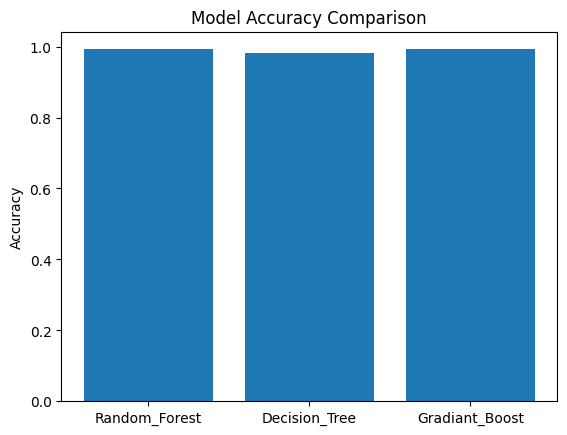

In [324]:
models = ["Random_Forest","Decision_Tree","Gradiant_Boost"]
scores = [0.992,0.983,0.993]

plt.bar(models,scores)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")


Text(0.5, 1.0, 'Confusion Matrix')

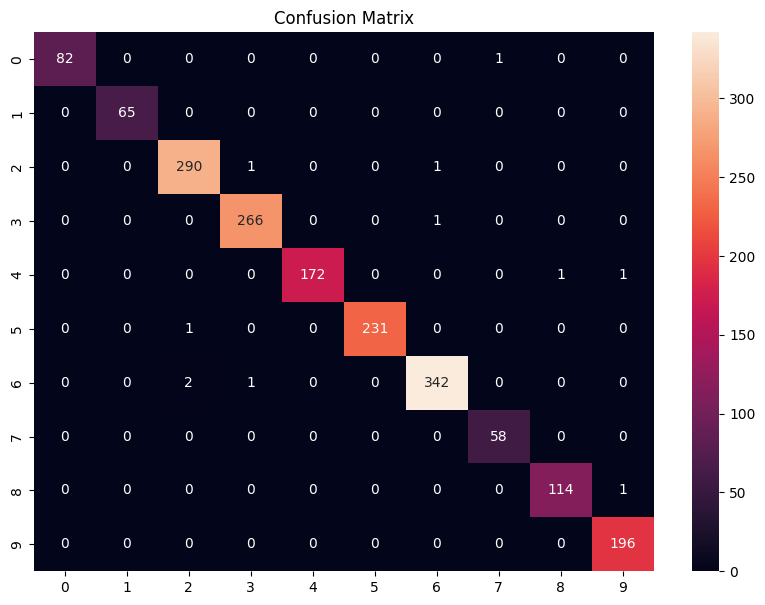

In [325]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testlab, te_prd)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")


Text(0.5, 1.0, 'Top Important Features')

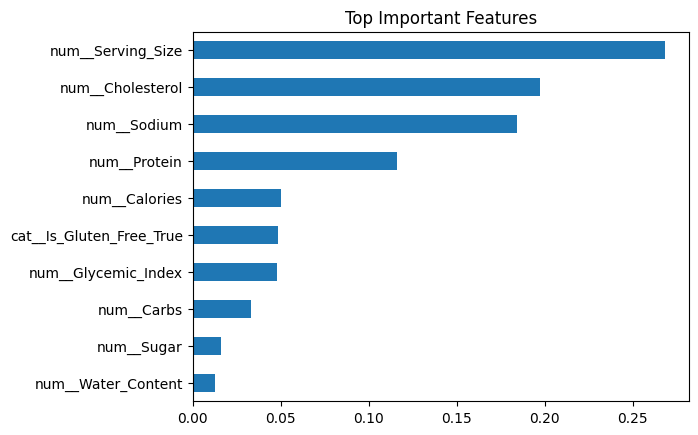

In [326]:
importances = model.named_steps["classifier"].feature_importances_
features = model.named_steps["preprocessing"].get_feature_names_out()

pd.Series(importances,index=features).sort_values().tail(10).plot(kind="barh")
plt.title("Top Important Features")
